In [62]:
!pip install openpyxl

In [63]:
# Основные библиотеки
import numpy as np
import pandas as pd

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Предобработка и моделирование
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Статистика
from scipy.stats import f_oneway


In [64]:
df = pd.read_excel('final_project_ML.xlsx')
df = df.drop_duplicates()
df

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,...,0,0,0,0,0,0,0,0,0,0
997,997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,...,0,0,0,0,0,0,0,0,0,0
998,998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,...,1,0,0,0,0,0,0,0,0,0
999,999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,...,0,0,0,0,0,0,0,0,0,0


- удалим признаки с одним уникальным значением

In [66]:
# Пропущенные значения
missing = df.isnull().sum().sort_values(ascending=False)
print("Пропуски:", missing[missing > 0])

# Удаление столбцов с одним уникальным значением
cols_to_drop = [col for col in df.columns if df[col].nunique() <= 1]
print(f"Удалено столбцов с одним уникальным значением: {len(cols_to_drop)}")

df = df.drop(columns=cols_to_drop)


Пропуски: MinAbsPartialCharge    3
BCUT2D_LOGPHI          3
BCUT2D_MWHI            3
MaxAbsPartialCharge    3
MinPartialCharge       3
MaxPartialCharge       3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64
Удалено столбцов с одним уникальным значением: 18


- Заполним пропуски медианой

In [68]:
cols_to_fill = [
    'MinAbsPartialCharge', 'MaxAbsPartialCharge', 'MinPartialCharge', 'MaxPartialCharge',
    'BCUT2D_LOGPHI', 'BCUT2D_MWHI', 'BCUT2D_MWLOW',
    'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPLOW',
    'BCUT2D_MRHI', 'BCUT2D_MRLOW'
]

# Безопасное и рекомендованное заполнение пропусков
for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

- изучим признаки

In [70]:
for col in df.columns:
    dtype = df[col].dtype
    n_nan = df[col].isna().sum()
    
    if pd.api.types.is_numeric_dtype(df[col]):
        min_val = df[col].min(skipna=True)
        max_val = df[col].max(skipna=True)
        print(f"{col} | тип: {dtype} | NaN: {n_nan} | min: {min_val} | max: {max_val}")
    else:
        print(f"{col} | тип: {dtype} | NaN: {n_nan}")


Unnamed: 0 | тип: int64 | NaN: 0 | min: 0 | max: 1000
IC50, mM | тип: float64 | NaN: 0 | min: 0.003516693745208505 | max: 4128.529376550779
CC50, mM | тип: float64 | NaN: 0 | min: 0.700807912518016 | max: 4538.976188530915
SI | тип: float64 | NaN: 0 | min: 0.01148926945588554 | max: 15620.6
MaxAbsEStateIndex | тип: float64 | NaN: 0 | min: 2.321942215462859 | max: 15.93346261652809
MaxEStateIndex | тип: float64 | NaN: 0 | min: 2.321942215462859 | max: 15.93346261652809
MinAbsEStateIndex | тип: float64 | NaN: 0 | min: 3.921012849605887e-05 | max: 1.374614197530864
MinEStateIndex | тип: float64 | NaN: 0 | min: -6.992795611300078 | max: 1.374614197530864
qed | тип: float64 | NaN: 0 | min: 0.05956677724786782 | max: 0.9472648367815284
SPS | тип: float64 | NaN: 0 | min: 9.416666666666666 | max: 60.27272727272727
MolWt | тип: float64 | NaN: 0 | min: 110.156 | max: 904.7770000000005
HeavyAtomMolWt | тип: float64 | NaN: 0 | min: 100.076 | max: 856.393
ExactMolWt | тип: float64 | NaN: 0 | min: 1

- нет нулевых/отрицательных значений IC50, СС50, SI - можем логарифмировать

Целевая переменная:

IC50 — это концентрация вещества, при которой ингибируется (подавляется, замедляется или останавливается какая-либо биохимическая активность) 50% какая-какой-либо биохимическая активность. Чем ниже значение, тем выше активность соединения.
Вероятно проводятся результаты in vitro первичного скрининга активности каких-то веществ на вирусных культурах

Описание дискрипторов (из курса химоинформатики)
Ссылки:
- Маджидов Т.И. Введение в хемоинформатику: Компьютерное представление химических структур: учеб. пособие / Т.И. Маджидов, И.И. Баскин, И.С. Антипин, А.А. Варнек. – Казань: Казан. ун-т, 2013. – 174 с.
- Chemoinformatics: Basic Concepts and Methods
Share Icon, Thomas Engel (Editor), Johann Gasteiger (Editor) 
ISBN: 978-3-527-33109-3 December 2018 608 pages

---

1. Целевые и контрольные переменные

	IC50, mM	- Концентрация ингибитора, при которой подавляется 50% активности (мера активности соединения).
	CC50, mM	- Концентрация, вызывающая 50% токсичности (мера токсичности).
	SI	        - Selectivity Index = CC50 / IC50 (чем выше, тем лучше: высокая активность и низкая токсичность).

---

2. Общие свойства молекулы

	MolWt, HeavyAtomMolWt, ExactMolWt	- Молекулярный вес.
	NumValenceElectrons, NumRadicalElectrons	- Количество валентных/радикальных электронов.
	HeavyAtomCount	                - Число атомов, не являющихся водородом.
	FractionCSP3	                - Доля sp3-гибридизованных углеродов.
	TPSA	                        - Полярная поверхность (Topological Polar Surface Area) — влияет на проницаемость и абсорбцию.
	qed	                        - Quantitative Estimation of Drug-likeness — интегральный показатель "пригодности" соединения как лекарства.
	SPS	                            - Synthetic Price Score — оценка сложности синтеза (если доступна).

---

3. Электронные дескрипторы

	MaxAbsEStateIndex, MinEStateIndex, EState_..., VSA_EState...	- Электронное состояние атомов (Electrotopological State).
	MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge	- Частичные заряды атомов.
	PEOE_VSA...	- Частичное распределение заряда по поверхностям (Partial Equalization of Orbital Electronegativities).

---

4. Топологические дескрипторы

	Chi0, Chi1n, Chi4v, Kappa1, Kappa2, Kappa3	- Индексы Кьера и индексы связности Чи — отражают топологию и разветвлённость молекулы.
	HallKierAlpha, BalabanJ, Ipc, AvgIpc, BertzCT	- Индексы топологической сложности/информации.

---

5. BCUT-дескрипторы

	BCUT2D_MWHI, BCUT2D_CHGHI, BCUT2D_LOGPHI, ...	- BCUT-дескрипторы — линейная комбинация молекулярных и атомных свойств (масса, заряд, logP, поляризуемость). Используются в библиотечном скрининге.

---

6. Morgan fingerprints & плотности

	FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3	- Плотность отпечатков по радиусам 1, 2, 3 (ECFP — Extended-Connectivity Fingerprints).

---

7. VSA-дескрипторы

	SMR_VSA, SlogP_VSA, PEOE_VSA	- Отражают распределение объёма поверхности молекулы в зависимости от различных свойств: LogP, заряда, молекулярного рефрактивного индекса (MR).

---

8. Фрагментные дескрипторы (fr_...)

Булевы или счётные признаки, указывающие на наличие определённых функциональных групп или структурных фрагментов:

	fr_Ar_OH, fr_phenol	- Фенольная группа.
	fr_NH2, fr_amine, fr_aniline	- Амины.
	fr_azide, fr_azo, fr_diazo	- Азо-соединения.
	fr_halogen, fr_alkyl_halide	- Галогены, галогеналкилы.
	fr_barbitur	- Барбитураты.
	fr_nitro, fr_nitro_arom	- Нитро-группы.
	fr_lactone, fr_lactam	- Лактон/лактам.
	fr_benzene, fr_pyridine, fr_thiazole, fr_furan	- Конкретные кольца.

---

9. Количественные дескрипторы структурных элементов

	NumHAcceptors, NumHDonors, NumHeteroatoms, NumRotatableBonds	- Количество водородных доноров/акцепторов, гетероатомов, вращающихся связей.
	NumAromaticRings, NumAliphaticRings, NumSaturatedRings	- Количество кольцевых элементов.

---

- удалим колонку SPS (предполагаемая сложность/стоимость синтеза) как не имеющую тношения к поставленной задаче

In [75]:
df = df.drop(columns=['SPS'])
df = df.drop(columns=['Unnamed: 0'])

Найдем коэфициент корреляции между IC50, mM  и CC50, mM

In [77]:
correlation = df['IC50, mM'].corr(df['CC50, mM'])
print("Коэффициент корреляции Пирсона:", correlation)

Коэффициент корреляции Пирсона: 0.521346157999401


- Важность признаков, их распределения и интерпретация, чтобы понять с какими признаами работать в первую очередь

In [79]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# Предполагаем, что DataFrame 'df' уже загружен

def get_top_features(df, target_column, n_top=30, exclude_features=[]):
    # Ищем признаки, которые нужно исключить (в т.ч. содержащие 'IC50' или 'CC50')
    excluded_substrings = ['IC50', 'CC50']
    exclude_features_set = set(exclude_features)
    
    for col in df.columns:
        if any(substr in col for substr in excluded_substrings):
            exclude_features_set.add(col)

    # Оставляем только допустимые признаки
    X_raw = df.drop(columns=[target_column] + list(exclude_features_set), errors='ignore')
    y = df[target_column]

    # Обработка пропусков
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X_raw)

    # Обучение модели
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)

    # Важность признаков
    importances = rf.feature_importances_
    feat_importance = pd.Series(importances, index=X_raw.columns).sort_values(ascending=False)

    return feat_importance.head(n_top)

# Получаем важные признаки для обоих таргетов
top_ic50 = get_top_features(df, 'IC50, mM', n_top=30, exclude_features=['SI'])
top_cc50 = get_top_features(df, 'CC50, mM', n_top=30, exclude_features=['SI'])

# Находим первые 5 общих признаков
common_features = []
i = 1
while len(common_features) < 5 and i <= 30:
    ic50_set = set(top_ic50.head(i).index)
    cc50_set = set(top_cc50.head(i).index)
    common = ic50_set.intersection(cc50_set)
    common_features = list(common)
    i += 1

common_features = common_features[:5]

print("Общие топ-5 важных признаков (без 'SI' и признаков с 'IC50'/'CC50' в имени):")
for idx, f in enumerate(common_features, 1):
    print(f"{idx}. {f}")

# Создаём полиномиальные признаки для этих 5 признаков
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

X_poly_raw = df[common_features]
imputer = SimpleImputer(strategy='mean')
X_poly = imputer.fit_transform(X_poly_raw)
X_poly_transformed = poly.fit_transform(X_poly)

# Заменяем пробелы на подчёркивания в названиях новых признаков
poly_feature_names = [name.replace(" ", "_") for name in poly.get_feature_names_out(common_features)]

# Создаём DataFrame с новыми именами признаков
poly_df = pd.DataFrame(X_poly_transformed, columns=poly_feature_names, index=df.index)

# Добавляем в оригинальный DataFrame
df = pd.concat([df, poly_df], axis=1)

# Выводим сообщение о добавленных признаках
print("\nДобавлены полиномиальные признаки:")
for f in poly_feature_names:
    if f not in common_features:
        print(f"- {f}")


Общие топ-5 важных признаков (без 'SI' и признаков с 'IC50'/'CC50' в имени):
1. Chi1n
2. BCUT2D_MWLOW
3. BCUT2D_MRLOW
4. Kappa2
5. VSA_EState4

Добавлены полиномиальные признаки:
- Chi1n^2
- Chi1n_BCUT2D_MWLOW
- Chi1n_BCUT2D_MRLOW
- Chi1n_Kappa2
- Chi1n_VSA_EState4
- BCUT2D_MWLOW^2
- BCUT2D_MWLOW_BCUT2D_MRLOW
- BCUT2D_MWLOW_Kappa2
- BCUT2D_MWLOW_VSA_EState4
- BCUT2D_MRLOW^2
- BCUT2D_MRLOW_Kappa2
- BCUT2D_MRLOW_VSA_EState4
- Kappa2^2
- Kappa2_VSA_EState4
- VSA_EState4^2


BCUT2D_MWLOW^2
Усиливает влияние молекулярной массы и распределения атомов с низким значением BCUT2D — отражает нелинейный эффект размера и структуры молекулы.

BCUT2D_MWLOW_Kappa2
Усиливает совместное влияние молекулярной массы и формы молекулы (Kappa2 — топологический индекс гибкости/извилистости).

BCUT2D_MWLOW_BCUT2D_MRLOW
Усиливает взаимодействие между массой и распределением атомов с низкой молекулярной радикальной величиной (MRLOW).

BCUT2D_MWLOW_VSA_EState4
Усиливает влияние массы вместе с электронным состоянием (EState4) и объемом поверхности (VSA) определённых участков молекулы.

BCUT2D_MWLOW_Chi1n
Усиливает совместный эффект массы и первого хирального индекса Chi1n, отражая влияние стереохимии.

Kappa2^2
Усиливает эффект топологической гибкости молекулы, учитывая более сложные изменения формы.

Kappa2_BCUT2D_MRLOW
Усиливает влияние гибкости вместе с распределением атомов с низкой молекулярной радикальной величиной.

Kappa2_VSA_EState4
Усиливает взаимодействие гибкости с электронной структурой и объемом поверхности.

Kappa2_Chi1n
Усиливает совместное влияние формы молекулы и её стереохимии.

BCUT2D_MRLOW^2
Усиливает влияние распределения атомов с низкой молекулярной радикальной величиной, отражая нелинейные эффекты.

BCUT2D_MRLOW_VSA_EState4
Усиливает взаимодействие между молекулярной радикальной величиной и электронной поверхностью.

BCUT2D_MRLOW_Chi1n
Усиливает совместное влияние молекулярной радикальной величины и хиральности.

VSA_EState4^2
Усиливает эффект электронной структуры и поверхности, отражая нелинейные взаимодействия.

VSA_EState4_Chi1n
Усиливает взаимодействие электронной структуры с хиральностью.

Chi1n^2
Усиливает влияние хиральности и стереохимических особенностей молекулы.

In [81]:
print(df.columns.tolist())

['IC50, mM', 'CC50, mM', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11',

CC50, mM               0.542086
SI                     0.392238
BCUT2D_CHGLO           0.007278
Kappa2                 0.003888
SMR_VSA3               0.002970
EState_VSA4            0.002674
Chi1n_Kappa2           0.002549
Kappa3                 0.002098
MaxPartialCharge       0.002068
BCUT2D_MWLOW^2         0.001858
Kappa2^2               0.001542
MolMR                  0.001512
MolWt                  0.001313
Kappa1                 0.001244
BCUT2D_MWLOW           0.001225
Chi0v                  0.001173
Kappa2                 0.001132
Chi1n_BCUT2D_MWLOW     0.001114
Chi0n                  0.001107
BCUT2D_MRHI            0.001083
BCUT2D_MWLOW_Kappa2    0.001041
LabuteASA              0.000974
FpDensityMorgan1       0.000953
BCUT2D_LOGPHI          0.000951
ExactMolWt             0.000913
Chi1                   0.000798
Chi0                   0.000763
AvgIpc                 0.000749
Chi1n                  0.000729
MaxAbsPartialCharge    0.000643
dtype: float64


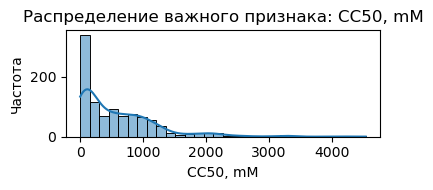

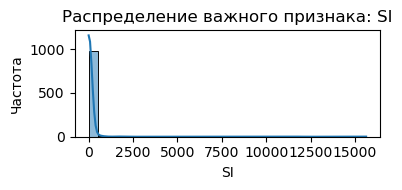

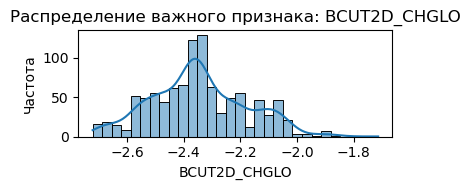

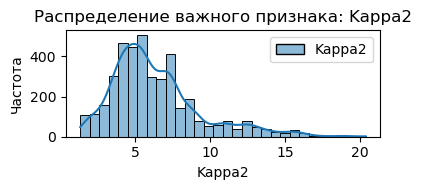

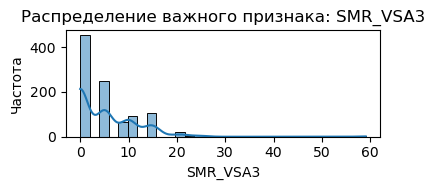

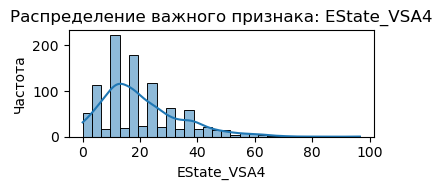

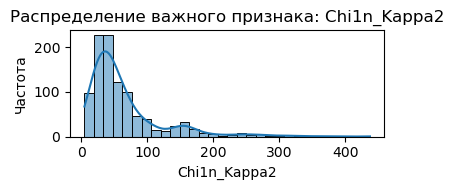

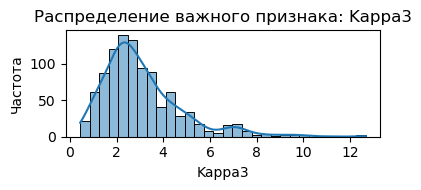

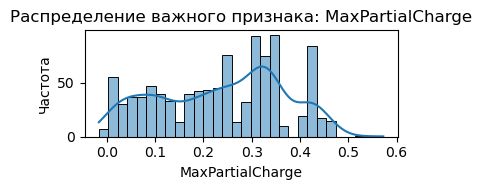

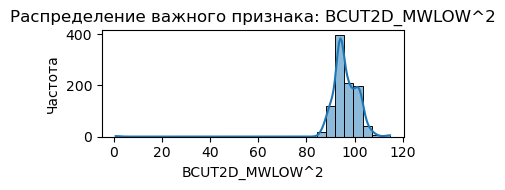

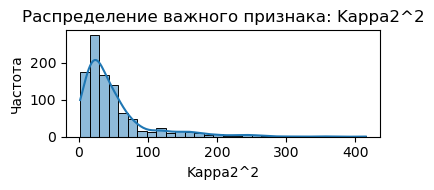

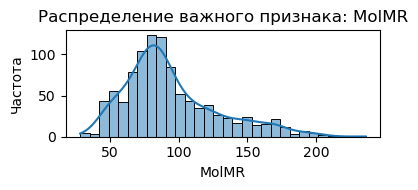

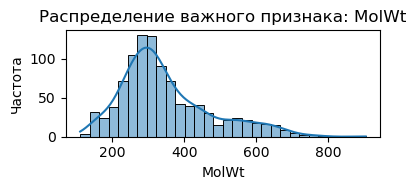

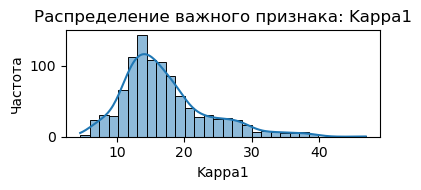

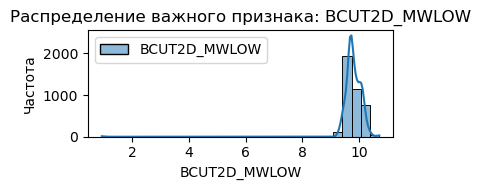

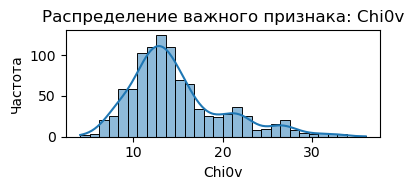

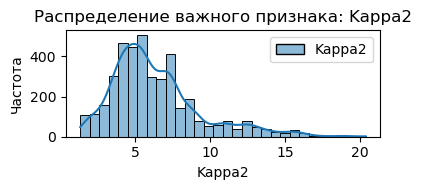

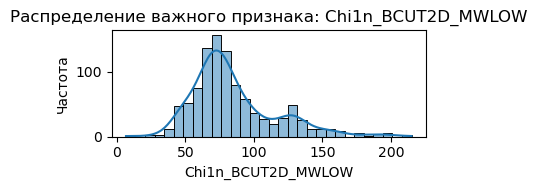

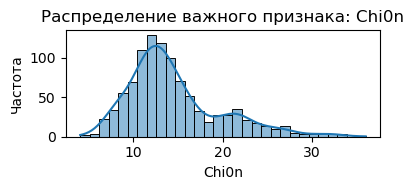

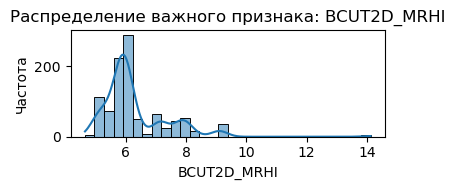

In [82]:
# Отделим целевую переменную и признаки
X_raw = df.drop(columns=['IC50, mM'])  # признаки
y = df['IC50, mM']  # целевая переменная

# Обработка пропусков (если есть)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X_raw)

# Обучаем модель
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Получаем важность признаков
importances = rf.feature_importances_

# Сопоставим с названиями признаков
feat_importance = pd.Series(importances, index=X_raw.columns)
feat_importance = feat_importance.sort_values(ascending=False)

# Покажем топ-20 признаков
print(feat_importance.head(30))

# Строим гистограммы для топ-10 важных признаков
top_features = feat_importance.head(20).index

for column in top_features:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Распределение важного признака: {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()


признаки IC50, CC50, SI, MolWt, TPSA, ExactMolWt имеют сильную правостороннюю асимметрию (много маленьких значений и редкие большие), что делает полезным логарифмическое преобразование этих признаков (для нормализации и интерпретации):

- также логарифмируем сильно смещенные важные признаки BCUT2D_MWLOW, SMR_VSA3 ( отрицательных значений признаки не имеют)

# Future engineering

- логарифмируем IC50, CC50, SI

In [87]:
# Логарифмическое преобразование
df['log_IC50'] = np.log10(df['IC50, mM'])
df['log_CC50'] = np.log10(df['CC50, mM'])
df['log_SI'] = np.log10(df['SI'])
#df['log_TPSA'] = np.log10(df['TPSA'])
#df_cut = df_cut.drop(columns=['IC50, mM'])
#df_cut_bin = df_cut.drop(columns=['IC50, mM'])



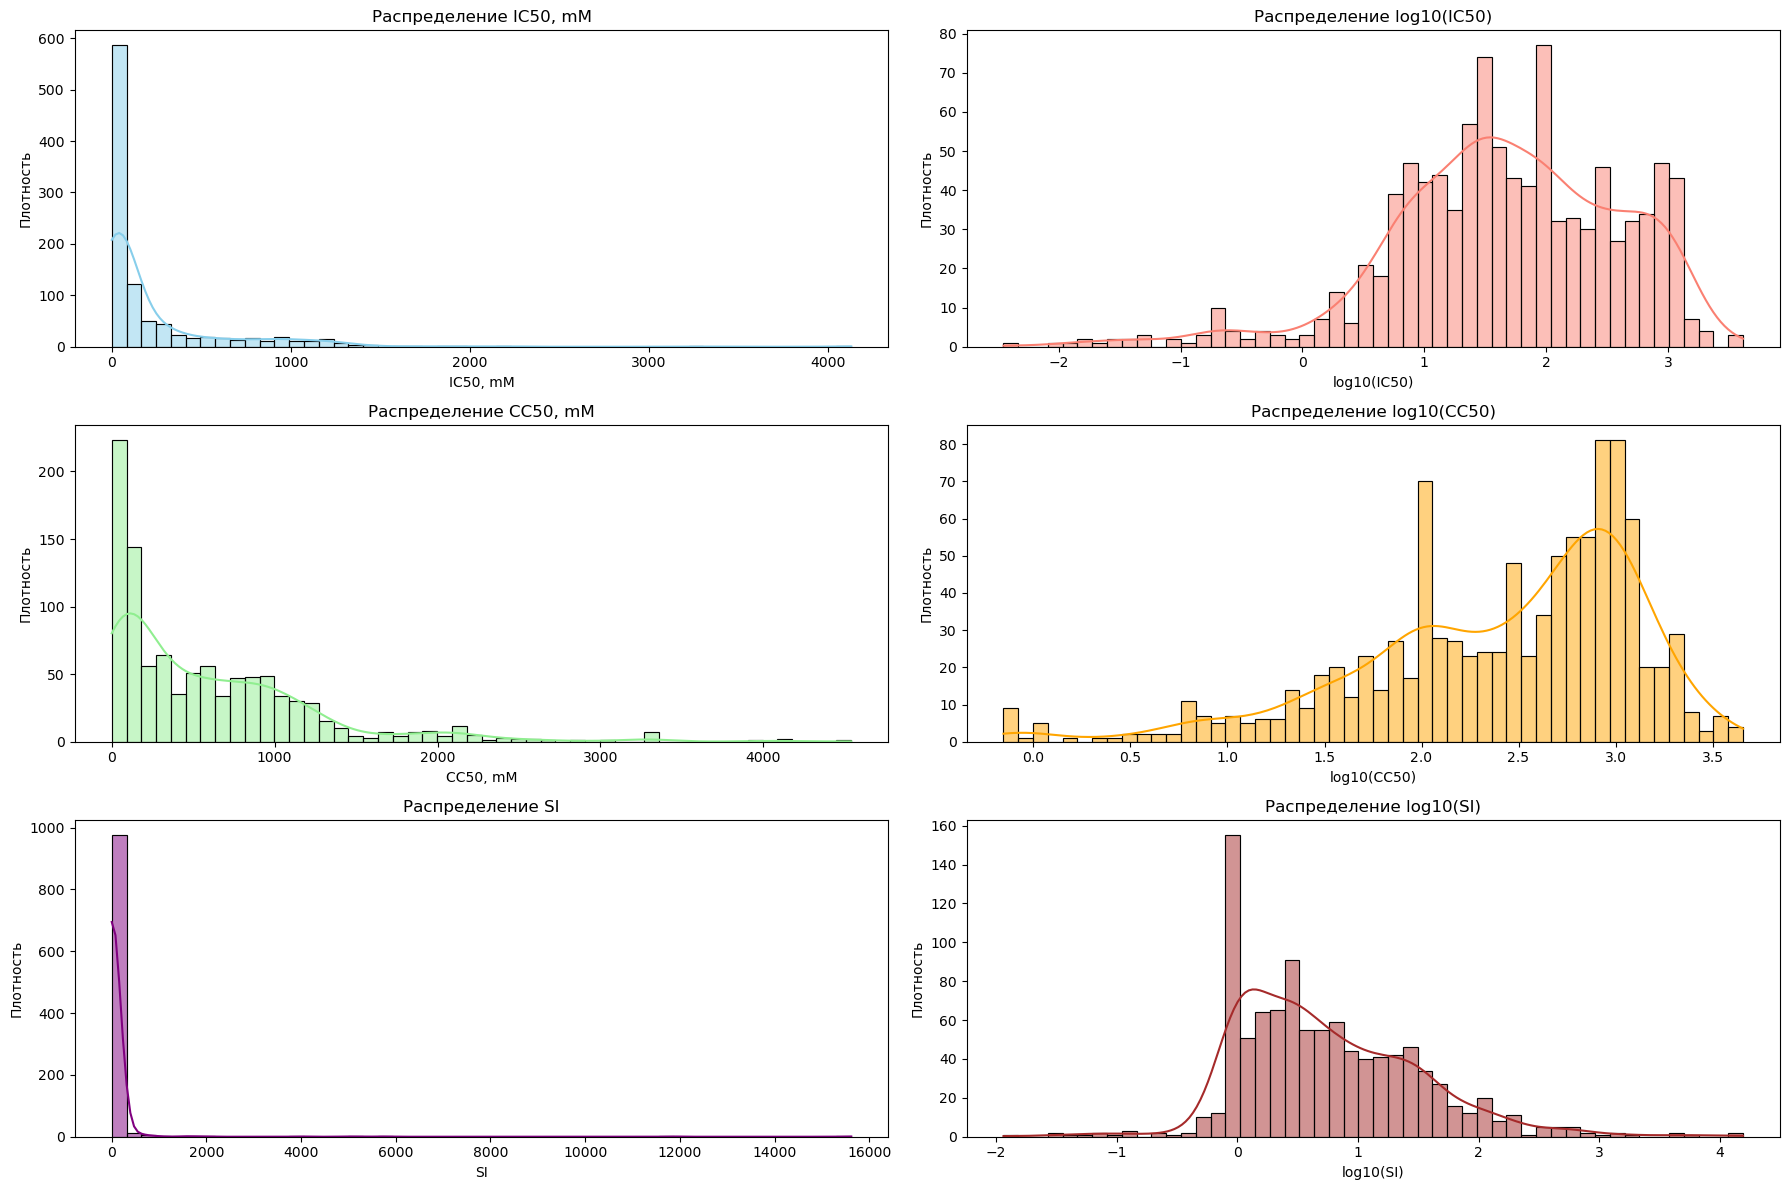

In [88]:

# Предварительная очистка (если есть нули или отрицательные значения)
df = df[(df['IC50, mM'] > 0) & (df['CC50, mM'] > 0) & (df['SI'] > 0)]

# Визуализация
plt.figure(figsize=(18, 12))

# IC50
plt.subplot(3, 2, 1)
sns.histplot(df['IC50, mM'], bins=50, kde=True, color='skyblue')
plt.title('Распределение IC50, mM')
plt.xlabel('IC50, mM')
plt.ylabel('Плотность')

plt.subplot(3, 2, 2)
sns.histplot(df['log_IC50'], bins=50, kde=True, color='salmon')
plt.title('Распределение log10(IC50)')
plt.xlabel('log10(IC50)')
plt.ylabel('Плотность')

# CC50
plt.subplot(3, 2, 3)
sns.histplot(df['CC50, mM'], bins=50, kde=True, color='lightgreen')
plt.title('Распределение CC50, mM')
plt.xlabel('CC50, mM')
plt.ylabel('Плотность')

plt.subplot(3, 2, 4)
sns.histplot(df['log_CC50'], bins=50, kde=True, color='orange')
plt.title('Распределение log10(CC50)')
plt.xlabel('log10(CC50)')
plt.ylabel('Плотность')

# SI
plt.subplot(3, 2, 5)
sns.histplot(df['SI'], bins=50, kde=True, color='purple')
plt.title('Распределение SI')
plt.xlabel('SI')
plt.ylabel('Плотность')

plt.subplot(3, 2, 6)
sns.histplot(df['log_SI'], bins=50, kde=True, color='brown')
plt.title('Распределение log10(SI)')
plt.xlabel('log10(SI)')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show()


До преобразования (IC50, mM):
Распределение сильно смещено вправо (правосторонняя асимметрия).

Большинство значений сосредоточено в диапазоне ниже 200 мМ, а хвост тянется далеко вправо (до 4000 мМ).

Такая форма плохо подходит для многих моделей машинного обучения, особенно линейных, поскольку они предполагают нормальное или хотя бы симметричное распределение ошибок.

После преобразования (log10(IC50)):
Распределение стало более симметричным и "похожим" на нормальное, несмотря на лёгкую асимметрию.

Признак теперь лучше поддаётся линейному моделированию и другим алгоритмам, чувствительным к масштабу и распределению (например, регрессии, SVM, kNN).

Выбросы и редкие значения стали менее доминирующими.

# Вывод:
- в качестве целевых переменных для регрессионных моделей будем брать  log10(IC50) log10(СC50) log10(SI)

- создадим признаки NumHAcceptors / NumHDonors и MolWt / TPSA
- инженерные соотношения, созданные для извлечения более сложных паттернов из базовых молекулярных дескрипторов

1. NumHAcceptors / NumHDonors - отношение числа акцепторов водородных связей к числу доноров в молекуле:

Соотношение >1: больше акцепторов — молекула может принимать больше водородных связей, чем отдавать.

Соотношение <1: больше доноров — молекула активнее отдаёт водородные связи.

Влияет на:

Растворимость (в воде и липидах),

Способность проникать через мембраны,

Биодоступность и селективность.

2. MolWt / TPSA - отношение молекулярной массы к полярной поверхности

Высокое значение → большая молекула с относительно малой полярной поверхностью:

Возможно гидрофобная, с хорошей проницаемостью через клеточные мембраны.

Низкое значение → либо малая масса, либо высокая полярность:

Может иметь плохую проникающую способность, но лучше растворяться в воде.

Используется для:
Прогнозирования пероральной биодоступности.

3. FractionCSP3 / Kappa1: может указывать на "насыщенность" и степень ветвления → потенциально полезно для предсказания биодоступности и сродства.

4. NumRotatableBonds / HeavyAtomCount — гибкость молекулы
Что отражает: относительная подвижность структуры.

Интерпретация: высокая гибкость может снижать аффинность или влиять на селективность

5. FractionCSP3 × MolWt — "насыщенность массы"
Что отражает: насколько насыщенная и тяжёлая молекула.

Интерпретация: низкое значение — плоская ароматическая структура, высокое — насыщенная трёхмерная.

6. NumHAcceptors + NumHDonors — общее количество водородных связей
Что отражает: потенциальную водородную активность.

Интерпретация: может влиять на растворимость, связывание с белками, проникновение.



In [92]:
# Найти дублирующиеся названия колонок
duplicated_columns = df.columns[df.columns.duplicated()].tolist()

# Вывести их
print("Дублирующиеся колонки:", duplicated_columns)

Дублирующиеся колонки: ['Chi1n', 'BCUT2D_MWLOW', 'BCUT2D_MRLOW', 'Kappa2', 'VSA_EState4']


In [93]:
import numpy as np

# 1. MolWt / TPSA
required_cols_1 = ['MolWt', 'TPSA']
if all(col in df.columns for col in required_cols_1):
    epsilon = 1.0
    ratio = df['MolWt'] / (df['TPSA'] + epsilon)
    ratio_clipped = ratio.clip(1, 100)
    df['MolWt_TPSA_ratio'] = ratio_clipped
    df['Log_MolWt_TPSA_ratio'] = np.log1p(ratio_clipped)
else:
    print("Один из признаков MolWt или TPSA отсутствует.")

# 2. FractionCSP3 / Kappa1
required_cols_2 = ['FractionCSP3', 'Kappa1']
if all(col in df.columns for col in required_cols_2):
    epsilon = 1e-3
    ratio = df['FractionCSP3'] / (df['Kappa1'] + epsilon)
    ratio_clipped = ratio.clip(0, 10)
    df['CSP3_Kappa1_ratio'] = ratio_clipped
    df['Log_CSP3_Kappa1_ratio'] = np.log1p(ratio_clipped)
else:
    print("Один из признаков FractionCSP3 или Kappa1 отсутствует.")

# 4. NumHAcceptors + NumHDonors
if all(col in df.columns for col in ['NumHAcceptors', 'NumHDonors']):
    total_hbond = df['NumHAcceptors'] + df['NumHDonors']
    total_hbond_clipped = total_hbond.clip(0, 30)
    df['Total_HBonding'] = total_hbond_clipped
    df['Log_Total_HBonding'] = np.log1p(total_hbond_clipped)

# 5. FractionCSP3 * MolWt
if all(col in df.columns for col in ['FractionCSP3', 'MolWt']):
    product = df['FractionCSP3'] * df['MolWt']
    product_clipped = product.clip(0, 1000)
    df['CSP3_MolWt_product'] = product_clipped
    df['Log_CSP3_MolWt_product'] = np.log1p(product_clipped)

# 6. NumRotatableBonds / HeavyAtomCount
if all(col in df.columns for col in ['NumRotatableBonds', 'HeavyAtomCount']):
    epsilon = 1e-3
    ratio = df['NumRotatableBonds'] / (df['HeavyAtomCount'] + epsilon)
    ratio_clipped = ratio.clip(0, 1)
    df['Flexibility'] = ratio_clipped
    df['Log_Flexibility'] = np.log1p(ratio_clipped)

# 7. qed / SPS
if all(col in df.columns for col in ['qed', 'SPS']):
    epsilon = 1e-3
    ratio = df['qed'] / (df['SPS'] + epsilon)
    ratio_clipped = ratio.clip(0, 10)
    df['QED_SPS_ratio'] = ratio_clipped
    df['Log_QED_SPS_ratio'] = np.log1p(ratio_clipped)


- для MaxAbsPartialCharge, MinAbsPartialCharge, MaxPartialCharge, MinPartialCharge введем среднее и разброс

Среднее этих показателей по группе молекул помогает понять общий уровень и тенденцию зарядов в датасете — например, средний максимальный заряд по всем молекулам.

Разброс (дисперсия, стандартное отклонение) показывает вариативность: насколько сильно отличаются молекулы по этим характеристикам.

In [95]:
# Список колонок, для которых считаем среднее и разброс
cols = ['MaxAbsPartialCharge', 'MinAbsPartialCharge', 'MaxPartialCharge', 'MinPartialCharge']

# Создаем новые признаки — среднее и стандартное отклонение по этим колонкам
df['Mean_Charge'] = df[cols].mean(axis=1)        # среднее по строке
df['Std_Charge'] = df[cols].std(axis=1)          # стандартное отклонение по строке


- определим какие колонки лучше логарифмировать

-  введем агргационные признаки для следующих дескрипторов:
  
Топологические индексы	Chi, Kappa

Электронные состояния	EState_

Заряды на атомах PEOE_VSA

Площадь поверхности молекулы SMR


In [98]:
# Универсальная функция
def aggregate_custom_features(df, feature_list, name):
    df[f'{name}_mean'] = df[feature_list].mean(axis=1)
    df[f'{name}_max'] = df[feature_list].max(axis=1)
    df[f'{name}_sum'] = df[feature_list].sum(axis=1)
    df[f'{name}_std'] = df[feature_list].std(axis=1)
    return df

# 1. Chi дескрипторы
chi_cols = [col for col in df.columns if col.startswith('Chi')]
df = aggregate_custom_features(df, chi_cols, 'Chi')

# 2. PEOE_VSA
peoe_cols = [col for col in df.columns if col.startswith('PEOE_VSA')]
df = aggregate_custom_features(df, peoe_cols, 'PEOE_VSA')

# 3. EState_VSA
estate_cols = [col for col in df.columns if col.startswith('EState_VSA')]
df = aggregate_custom_features(df, estate_cols, 'EState_VSA')

# 4. Kappa дескрипторы — перечислены явно, т.к. немного
kappa_cols = ['Kappa1', 'Kappa2', 'Kappa3']
df = aggregate_custom_features(df, kappa_cols, 'Kappa')

# 5. SMR_VSA дескрипторы
smr_cols = [
    'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5',
    'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SMR_VSA10'
]
df = aggregate_custom_features(df, smr_cols, 'SMR_VSA')

# 6. SlogP
estate_cols = [col for col in df.columns if col.startswith('SlogP')]
df = aggregate_custom_features(df, estate_cols, 'SlogP')

# 7. VSA_EState дескрипторы
vsa_estate_cols = [col for col in df.columns if col.startswith('VSA_EState')]
df = aggregate_custom_features(df, vsa_estate_cols, 'VSA_EState')

- Корреляция признаков с целевой переменной log(IC50)

C:\Users\apex_\AppData\Local\Temp\ipykernel_19056\2396213747.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature', data=corr_df, palette='coolwarm')


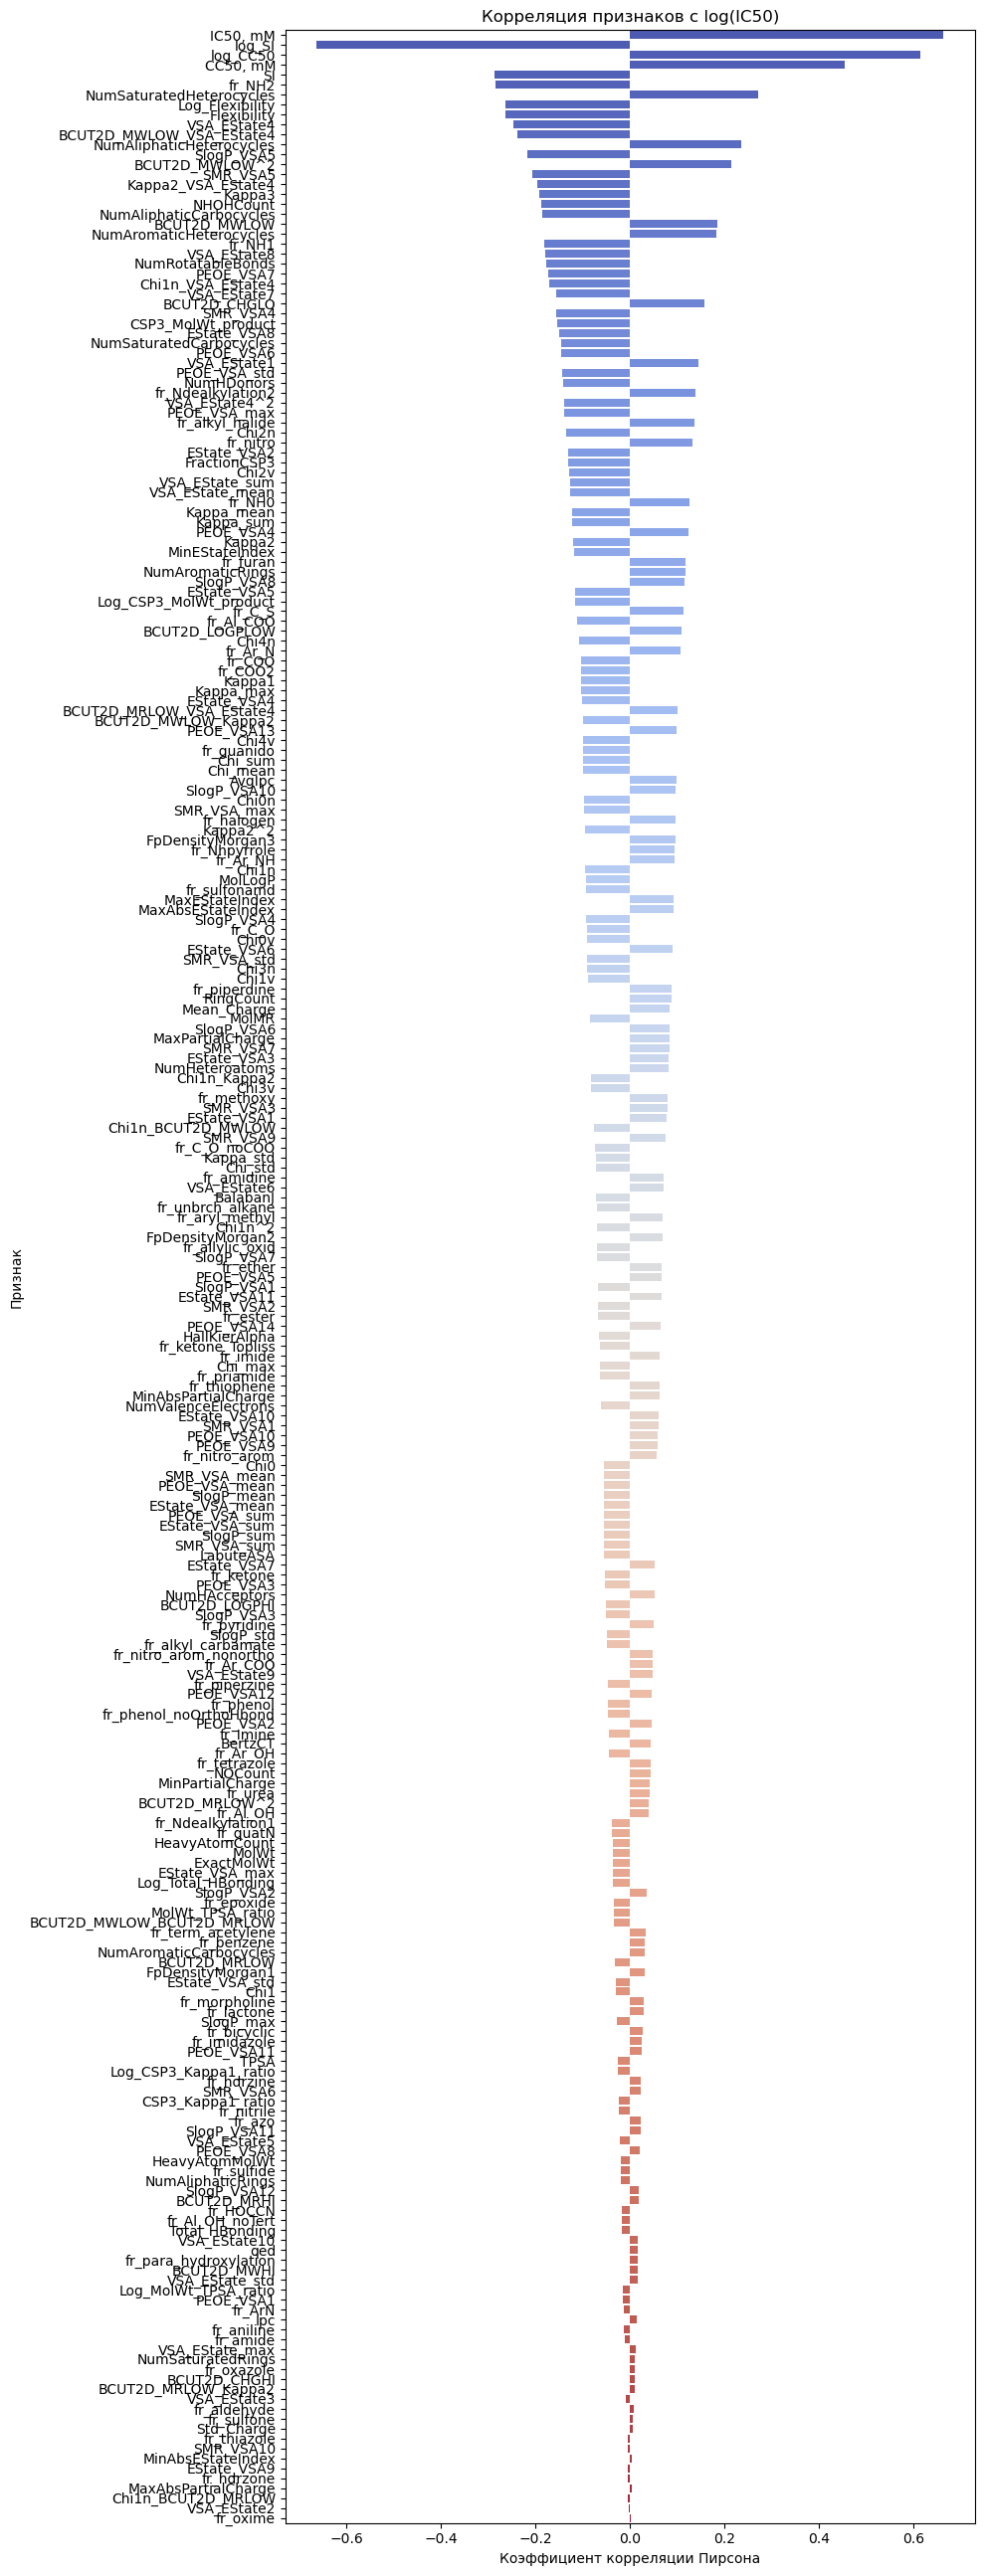

In [100]:

# Допустим, у вас есть DataFrame df, где 'log_IC50' — целевая переменная
# и остальные столбцы — признаки.

# Рассчитаем корреляцию признаков с целевой переменной
correlations = df.corr()['log_IC50'].drop('log_IC50')

# Преобразуем в DataFrame для удобства визуализации
corr_df = correlations.to_frame().reset_index()
corr_df.columns = ['Feature', 'Correlation']

# Отсортируем по абсолютному значению корреляции
corr_df['abs_corr'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by='abs_corr', ascending=False)

# Построим барплот корреляций
plt.figure(figsize=(10, 26))
sns.barplot(x='Correlation', y='Feature', data=corr_df, palette='coolwarm')
plt.title('Корреляция признаков с log(IC50)')
plt.xlabel('Коэффициент корреляции Пирсона')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()


# бинаризация признаков

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# === Очистка данных ===
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()
df_cleaned = df_cleaned[(np.abs(df_cleaned) < 1e10).all(axis=1)]

# === Масштабирование данных ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Удаляем дубликаты столбцов, если есть
df_scaled = df_scaled.loc[:, ~df_scaled.columns.duplicated()]

# === Подсчёт выбросов по Z-оценке ===
outliers_percent = {}
n_rows = df_scaled.shape[0]

for col in df_scaled.columns:
    col_data = df_scaled[col]
    outliers = col_data[(col_data > 3) | (col_data < -3)]
    percent = len(outliers) / n_rows * 100
    outliers_percent[col] = percent

# === Сохраняем boxplot ===
plt.figure(figsize=(12, 35))
sns.boxplot(data=df_scaled, orient='h')
plt.title('Boxplot для стандартизованных признаков (Z-score)')
plt.tight_layout()
plt.savefig("zscore_boxplot.png")
plt.close()

# === Сохраняем текстовый отчёт ===
with open("zscore_outliers_report.txt", "w", encoding="utf-8") as f:
    f.write("Процент выбросов по признакам (|Z| > 3), отсортировано по убыванию:\n\n")
    for feature, percent in sorted(outliers_percent.items(), key=lambda x: x[1], reverse=True):
        f.write(f"{feature}: {percent:.2f}%\n")

print("Отчёт сохранён в файл: zscore_outliers_report.txt")
print("График сохранён в файл: zscore_boxplot.png")


Отчёт сохранён в файл: zscore_outliers_report.txt
График сохранён в файл: zscore_boxplot.png


In [121]:
import numpy as np
import pandas as pd

# Копируем исходный датасет
df_bin = df.copy()
n_rows = df.shape[0]

# Работаем только с числовыми столбцами
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Преобразование разреженных признаков в бинарные
for col in numeric_cols:
    col_data = df[col]
    non_zero_count = (col_data != 0).sum()
    non_zero_percent = non_zero_count / n_rows * 100

    # Проверяем, что это скаляр, и сравниваем
    if isinstance(non_zero_percent, (float, int)) and (0 < non_zero_percent < 10):
        df_bin[col] = col_data.apply(lambda x: 1 if x != 0 else 0)
        print(f"Признак '{col}': преобразован в бинарный (0/1), ненулевых: {non_zero_percent:.2f}%")

# --- Замена выбросов по IQR ---
for col in numeric_cols:
    Q1 = df_bin[col].quantile(0.25)
    Q3 = df_bin[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 15 * IQR

    outliers = (df_bin[col] < lower_bound) | (df_bin[col] > upper_bound)
    n_outliers = outliers.sum()

    # Заменим выбросы на границы
    df_bin.loc[df_bin[col] < lower_bound, col] = lower_bound
    df_bin.loc[df_bin[col] > upper_bound, col] = upper_bound

    if n_outliers > 0:
        print(f"Признак '{col}': {n_outliers} выброс(ов) заменено по IQR.")


Признак 'SMR_VSA2': преобразован в бинарный (0/1), ненулевых: 1.10%
Признак 'SlogP_VSA7': преобразован в бинарный (0/1), ненулевых: 5.49%
Признак 'EState_VSA11': преобразован в бинарный (0/1), ненулевых: 2.60%
Признак 'fr_Al_COO': преобразован в бинарный (0/1), ненулевых: 5.59%
Признак 'fr_ArN': преобразован в бинарный (0/1), ненулевых: 1.40%
Признак 'fr_Ar_COO': преобразован в бинарный (0/1), ненулевых: 0.10%
Признак 'fr_Ar_NH': преобразован в бинарный (0/1), ненулевых: 3.60%
Признак 'fr_Ar_OH': преобразован в бинарный (0/1), ненулевых: 8.39%
Признак 'fr_COO': преобразован в бинарный (0/1), ненулевых: 5.69%
Признак 'fr_COO2': преобразован в бинарный (0/1), ненулевых: 5.69%
Признак 'fr_C_S': преобразован в бинарный (0/1), ненулевых: 4.30%
Признак 'fr_HOCCN': преобразован в бинарный (0/1), ненулевых: 0.10%
Признак 'fr_Ndealkylation1': преобразован в бинарный (0/1), ненулевых: 6.19%
Признак 'fr_Ndealkylation2': преобразован в бинарный (0/1), ненулевых: 7.69%
Признак 'fr_Nhpyrrole': преоб

KeyError: "None of [Index([('B', 'C', 'U', 'T', '2', 'D', '_', 'M', 'W', 'L', 'O', 'W'), ('B', 'C', 'U', 'T', '2', 'D', '_', 'M', 'W', 'L', 'O', 'W')], dtype='object')] are in the [index]"

In [ ]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Предполагается, что df_bin уже загружен

# Выбираем числовые колонки
num_cols = df_bin.select_dtypes(include=['number']).columns

# Создаем трансформер Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Применяем трансформацию Yeo-Johnson ко всем числовым столбцам и заменяем в df_bin
df_bin[num_cols] = pt.fit_transform(df_bin[num_cols])

# Дисперсионный и кореляционный анализ

- выделим и удалим признаки с низкой дисперсией (<1e-4) (и высокой корреляцией (> 0.9)

In [123]:
import sys
import io

class Tee:
    """Копирует вывод одновременно в stdout и в буфер."""
    def __init__(self, stream):
        self.terminal = sys.stdout
        self.log = stream

    def write(self, message):
        self.terminal.write(message)
        self.log.write(message)

    def flush(self):
        self.terminal.flush()
        self.log.flush()


def analyze_and_create_cut(df_input, name='df'):
    report_buffer = io.StringIO()
    tee = Tee(report_buffer)
    original_stdout = sys.stdout
    sys.stdout = tee  # перенаправляем вывод

    try:
        print(f"\n===== Анализ датасета: {name} =====")
        
        df = df_input.copy()
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

        # --- Корреляционный анализ ---
        corr = df[numeric_cols].corr()
        plt.figure(figsize=(14, 12))
        sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
        plt.title(f'Корреляционная матрица ({name})')
        plt.tight_layout()
        plt.savefig(f"{name}_correlation_matrix.png")  # сохраняем график
        plt.close()

        # Корреляция с целевой переменной
        if 'log_IC50' in df.columns:
            corr_target = corr['log_IC50'].sort_values(ascending=False)
            print("\nКорреляция признаков с log_IC50:")
            print(corr_target)

        # --- Отбор признаков с низкой дисперсией ---
        low_variance_features = df[numeric_cols].var()[df[numeric_cols].var() < 1e-4].index.tolist()
        print(f"\nПризнаки с низкой дисперсией (<1e-4), которые рекомендуется удалить:\n{low_variance_features}")

        # --- Проверка мультиколлинеарности ---
        high_corr_pairs = []
        threshold = 0.9
        features_to_remove_corr = set()

        for i in range(len(numeric_cols)):
            for j in range(i + 1, len(numeric_cols)):
                c = corr.iloc[i, j]
                if abs(c) > threshold:
                    feat1 = numeric_cols[i]
                    feat2 = numeric_cols[j]
                    high_corr_pairs.append((feat1, feat2, c))
                    features_to_remove_corr.add(feat2)

        print("\nПары признаков с корреляцией > 0.9 (риск мультиколлинеарности):")
        for feat1, feat2, val in high_corr_pairs:
            print(f"{feat1} и {feat2}: корреляция = {val:.3f}")

        # --- Дисперсионный анализ (ANOVA) ---
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

        if 'log_IC50' in df.columns and categorical_cols:
            print("\nДисперсионный анализ (ANOVA):")
            for cat_col in categorical_cols:
                groups = []
                for level in df[cat_col].dropna().unique():
                    group = df[df[cat_col] == level]['log_IC50'].dropna()
                    if len(group) > 1:
                        groups.append(group)
                if len(groups) >= 2:
                    f_stat, p_val = f_oneway(*groups)
                    print(f"{cat_col}: F = {f_stat:.3f}, p = {p_val:.4f}")
                    if p_val < 0.05:
                        print(f" → '{cat_col}' статистически значим (p < 0.05)\n")
                else:
                    print(f"{cat_col}: недостаточно групп\n")
        else:
            print("ANOVA не проведён: нет категориальных признаков или log_IC50.")

        # --- Создание df_cut ---
        features_to_remove = set(low_variance_features) | features_to_remove_corr
        df_cut = df.drop(columns=features_to_remove)

        print(f"\nУдалено признаков: {len(features_to_remove)}")
        print(f"{name}.shape: {df.shape}, {name}_cut.shape: {df_cut.shape}")
        print(f"Удалённые признаки:\n{sorted(features_to_remove)}")

    finally:
        sys.stdout = original_stdout  # восстанавливаем stdout

    # Запись отчёта в файл
    with open(f"{name}_analysis_report.txt", "w", encoding="utf-8") as f:
        f.write(report_buffer.getvalue())

    print(f"Отчёт по анализу '{name}' сохранён в файл: {name}_analysis_report.txt")
    print(f"График корреляции сохранён в файл: {name}_correlation_matrix.png")

    return df_cut


# === Анализ и создание df_cut для df ===
df_cut = analyze_and_create_cut(df, name='df')

# === Анализ и создание df_cut_bin для df_bin ===
df_cut_bin = analyze_and_create_cut(df_bin, name='df_bin')



===== Анализ датасета: df =====

Корреляция признаков с log_IC50:
log_IC50                    1.000000
IC50, mM                    0.664432
log_CC50                    0.615896
CC50, mM                    0.455077
NumSaturatedHeterocycles    0.270582
                              ...   
Flexibility                -0.263745
Log_Flexibility            -0.264031
fr_NH2                     -0.284985
SI                         -0.287802
log_SI                     -0.663433
Name: log_IC50, Length: 267, dtype: float64

Признаки с низкой дисперсией (<1e-4), которые рекомендуется удалить:
[]

Пары признаков с корреляцией > 0.9 (риск мультиколлинеарности):
MaxAbsEStateIndex и MaxEStateIndex: корреляция = 1.000
MolWt и HeavyAtomMolWt: корреляция = 0.997
MolWt и ExactMolWt: корреляция = 1.000
MolWt и NumValenceElectrons: корреляция = 0.981
MolWt и Chi0n: корреляция = 0.903
MolWt и Chi0v: корреляция = 0.987
MolWt и Chi1: корреляция = 0.935
MolWt и Chi1n: корреляция = 0.953
MolWt и Chi1v: корреляци

# Сохраняем обработанные данные

In [ ]:
df.to_csv("df.csv", index=False)
df_bin.to_csv("df_bin.csv", index=False)
df_cut.to_csv("df_cut.csv", index=False)
df_cut_bin.to_csv("df_cut_bin.csv", index=False)

In [ ]:
df_orig= pd.read_excel('final_project_ML.xlsx')

Посмотрим что измнилось в датасетах по сравнению с оригинальным

In [ ]:
def compare_with_original(df_original, df_modified, name):
    report_lines = []
    report_lines.append(f"===== Сравнение с {name} =====")

    orig_cols = set(df_original.columns)
    mod_cols = set(df_modified.columns)

    removed = orig_cols - mod_cols
    added = mod_cols - orig_cols

    if removed:
        report_lines.append(f"\nУдалённые признаки:\n{sorted(removed)}")
    if added:
        report_lines.append(f"\nДобавленные признаки:\n{sorted(added)}")

    common_cols = list(orig_cols & mod_cols)

    # Сравниваем только числовые признаки
    numeric_cols = df_original[common_cols].select_dtypes(include=[np.number]).columns

    # Статистики
    threshold = 1e-3  # минимальное отличие для учёта как изменения

    orig_stats = df_original[numeric_cols].agg(['mean', 'std', 'min', 'max'])
    mod_stats = df_modified[numeric_cols].agg(['mean', 'std', 'min', 'max'])

    changes_found = False

    for stat in ['mean', 'std', 'min', 'max']:
        stat_changes = []
        for col in numeric_cols:
            val_orig = orig_stats.at[stat, col]
            val_mod = mod_stats.at[stat, col]
            if pd.isna(val_orig) or pd.isna(val_mod):
                continue
            if abs(val_orig - val_mod) > threshold:
                stat_changes.append(f"{col}: {stat} изменилось с {val_orig:.4f} на {val_mod:.4f}")
        if stat_changes:
            changes_found = True
            report_lines.append(f"\nИзменения в {stat}:")
            report_lines.extend(stat_changes)

    # Вывод и сохранение отчета
    if len(report_lines) > 1:
        print('\n'.join(report_lines))
        with open(f"report_{name}.txt", "w", encoding="utf-8") as f:
            f.write('\n'.join(report_lines))


In [ ]:
compare_with_original(df_orig, df, "df")
compare_with_original(df_orig, df_bin, "df_bin")
compare_with_original(df_orig, df_cut, "df_cut")
compare_with_original(df_orig, df_cut_bin, "df_cut_bin")